In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pop_state = pd.read_excel(r'../Dataset_pop/comb_state_ethno_gen.xlsx')
pop_state.columns


Index(['State', 'Year', 'Total_pop', 'Tot_Male', 'Tot_Fem', 'Bumi_M', 'Chi_M',
       'Ind_M', 'Other_M', 'Bumi_F', 'Chi_F', 'Ind_F', 'Other_F'],
      dtype='object')

In [3]:
# df= pd.read_csv(r'./Dataset_pop/comb_eth_FM.csv')

state_df = pd.read_excel(r'../Dataset_pop/States_pop_2.xlsx')
state_df.head()

,Year,Johor,Kedah,Kelantan,Melaka,Negeri Sembilan,Pahang,Penang,Perak,Perlis,Selangor,Terengganu,Sabah,Sarawak,Kuala Lumpur
0,1980,1646.2,1119.9,895.7,466.9,576.7,802.1,960.7,1807.4,148.7,1524.1,541.7,1055.1,1351.1,982.9
1,1981,1689.3,1140.2,920.5,472.6,587.2,820.6,975.4,1838.2,151.6,1594.6,560.8,1119.6,1380.2,1006.1
2,1982,1734.6,1161.8,947.1,478.7,598.9,842.3,990.9,1866.8,154.9,1668.3,581.4,1186.5,1410.4,1028.5
3,1983,1780.2,1183.9,974.6,484.8,611.3,864.8,1006.2,1891.1,158.2,1743.8,602.9,1255.1,1440.6,1050.7
4,1984,1825.8,1206.1,1002.6,491.2,623.8,888.7,1021.1,1912.3,161.7,1822.0,625.8,1325.7,1471.4,1072.2


In [4]:
state_df.columns

Index(['Year', 'Johor', 'Kedah', 'Kelantan', 'Melaka', 'Negeri Sembilan',
       'Pahang', 'Penang', 'Perak', 'Perlis', 'Selangor', 'Terengganu',
       'Sabah', 'Sarawak', 'Kuala Lumpur'],
      dtype='object')

# animated race chart

- We have to melt the dataframe to get the 'state' and 'population' columns for each year
- convert it to a long format df

In [5]:
import pandas as pd
import plotly.express as px

# melt the df
state_df_melted = state_df.melt(id_vars=['Year'], var_name='State', value_name='Population')

#create animated bar chart 
fig = px.bar(
    state_df_melted,
    x='Population',
    y='State',
    color='State',
    animation_frame="Year",
    orientation='h', 
    title='Population by State from 1980 to 2020',
    range_x=[0, state_df_melted['Population'].max()]
)

#hide the legend
fig.update_layout(
    showlegend=False,
    title={
        'text': 'Population by State from 1980 to 2020 (in 1000s)',
        'y': 0.95, 
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    title_font=dict(size=30, family='Arial', weight='bold', color='white'),
    template='plotly_dark',
    width=850,
    height=600,
    margin=dict(t=100, b=50, l=50, r=50),
    annotations=[
        dict(
            x=0.98,
            y=0.5,
            text="Year",
            font=dict(size=48, color='fuchsia', weight='bold'),
            xref='paper', yref='paper'        )
    ]
)

#update annotation for each frame to show correct year
for frame in fig.frames:
    frame_year = frame.name
    frame.layout.update(
        annotations=[
            dict(
                x=0.98,
                y=0.5,
                text=f'{frame_year}',
                font=dict(size=50, color='fuchsia', weight='bold'),
                xref='paper', yref='paper'            
            )
        ]
    )

fig.write_html("../charts_html/race-charts-state.html")

fig.show()

# Animated Scatter Plot
- we have to melt the dataframe for easier plotting

In [6]:
pop_state.head(3)

,State,Year,Total_pop,Tot_Male,Tot_Fem,Bumi_M,Chi_M,Ind_M,Other_M,Bumi_F,Chi_F,Ind_F,Other_F
0,Terengganu,1980,541.7,271.0,270.7,253.9,14.5,1.7,0.8,257.0,12.4,1.0,0.4
1,Terengganu,1981,560.8,281.9,278.8,264.3,14.6,1.7,1.3,264.7,12.5,1.0,0.7
2,Terengganu,1982,581.4,293.7,287.8,275.4,14.7,1.7,1.8,273.1,12.6,1.0,1.0


In [7]:
pop_state.columns

Index(['State', 'Year', 'Total_pop', 'Tot_Male', 'Tot_Fem', 'Bumi_M', 'Chi_M',
       'Ind_M', 'Other_M', 'Bumi_F', 'Chi_F', 'Ind_F', 'Other_F'],
      dtype='object')

In [8]:
pop_state['Bumi_Total'] = pop_state['Bumi_M'] + pop_state['Bumi_F']
pop_state['Chinese_Total'] = pop_state['Chi_M'] + pop_state['Chi_F']
pop_state['Indian_Total'] = pop_state['Ind_M'] + pop_state['Ind_F']
pop_state['Other_Total'] = pop_state['Other_M'] + pop_state['Other_F']

pop_state.head(3)



,State,Year,Total_pop,Tot_Male,Tot_Fem,Bumi_M,Chi_M,Ind_M,Other_M,Bumi_F,Chi_F,Ind_F,Other_F,Bumi_Total,Chinese_Total,Indian_Total,Other_Total
0,Terengganu,1980,541.7,271.0,270.7,253.9,14.5,1.7,0.8,257.0,12.4,1.0,0.4,510.9,26.9,2.7,1.2
1,Terengganu,1981,560.8,281.9,278.8,264.3,14.6,1.7,1.3,264.7,12.5,1.0,0.7,529.0,27.1,2.7,2.0
2,Terengganu,1982,581.4,293.7,287.8,275.4,14.7,1.7,1.8,273.1,12.6,1.0,1.0,548.5,27.3,2.7,2.8


In [9]:
pop_state.columns

Index(['State', 'Year', 'Total_pop', 'Tot_Male', 'Tot_Fem', 'Bumi_M', 'Chi_M',
       'Ind_M', 'Other_M', 'Bumi_F', 'Chi_F', 'Ind_F', 'Other_F', 'Bumi_Total',
       'Chinese_Total', 'Indian_Total', 'Other_Total'],
      dtype='object')

In [10]:
# melt the data to long format
pop_state_melted = pop_state.melt(
    id_vars=['Year', 'State'],
    value_vars=['Bumi_Total', 'Chinese_Total', 'Indian_Total', 'Other_Total'],
    var_name='Race', 
    value_name='Population'
)

max_population = pop_state_melted['Population'].max()

fig = px.scatter (
    pop_state_melted, 
    x='State', 
    y='Population', 
    size='Population',
    size_max=60,
    color='Race',
    animation_frame='Year', 
    range_y=[0, max_population + 600],  # Increase the upper limit
    labels = {'Population': 'Population (in thousands)', 'State': 'States'}
)

fig.update_layout(
    template='plotly_dark',
    showlegend=True,
    width=850,
    height=600,
    margin=dict(t=100, b=50, l=50, r=60),
    title= 'Population of Major Ethnicity from 1980 to 2020',
    title_font=dict(size=30, family='Arial', weight='bold', color='white'),  # Title color for dark mode
    title_x= 0.5, 
    title_y= 0.95,
    legend=dict(
        orientation="h",  
        yanchor="bottom", 
        y=1.05,  
        xanchor="center", 
        x=0.5  
    )
)

fig.write_html("../charts_html/bubble-charts-state.html")

fig.show()

# NOTE
- I know Sabah and Sarawak consist of major races that are completely different than the Malays in the Malaysian peninsular.
- In Sabah, they have Kadazan Dusun, Bajau and Murut and Sarawak - Bidayuh, Iban, Melanau
- but for the sake of simplicity, I combined Bumiputera (Malay) and the major races in Sabah and Sarawak in the same group.

# Error

**Year Error**
- 1996 was mistkaenly written as 1986 for Penang, Perak, Perlis, Terengganu, Sabah and Sarawak
- The circles were jumping around between states as the chart runs
- other issue: my excel data was locked for some reason and i cant seem to fix it, i copied the whole data to a new sheet - it works ok now lol
- I manually fixed the wrong year, changed 1986 to 1996

**Sabah Chinese population decreases from 2009**
- Cross-check figures with official stats from dept of stats
    - 1980 to 1990: https://pqi.stats.gov.my/result.php?token=58fbaf38a4cc42f0da2ca228c1a945d1
    - 1991 to 1999: https://pqi.stats.gov.my/result.php?token=3a0e6ef0f5d83e5cba7539cadefea405
    - 2000 to 2010: https://pqi.stats.gov.my/result.php?token=f7830a0f0144264a63ec24b8cc20b1e1
- Actually I mixed up Chinese population with Kadazan Dusun! - RECTIFIED

**Others population in Sabah 1990-1991**
* There's weird drop for this specific pop, I have cross-checked with the actual figures, they're like that. 
* I can't explain it. I guess we gotta just accept it

**Sudden jump of Bumi pop from 2009-2010**
* idk 


# Diversity Analysis

**Diversity Index Calculation**
- I am using Shannon-Wiener Index a.k.a Simpson's Diversity Index to measure the diversity across states in Malaysia from 1980 to 2020
- it considers the proportional representation of each race in a state
- it calcualtes the proportion of each ethnic group by dividing their population by the total population

In [11]:
import numpy as np 
import pandas as pd

# create a dictionary to hold the diversity indices
diversity_indices = {}

# LOOP THROUGH EAHC STATE AND YEAR
# Filter data for each state and year to get the population specific to the state and year being analyzed
for state in pop_state['State'].unique():
    for year in pop_state['Year'].unique():
        state_year_data = pop_state_melted[(pop_state_melted['State'] == state) & (pop_state_melted['Year'] == year)]
        
        #calculate total pop for that state and year
        total_population = state_year_data['Population'].sum()
        
        #calculate proportions 
        if total_population > 0:
            proportions = state_year_data['Population'] / total_population
            
            #calculate shannon-wiener index
            shannon_index = -np.sum(proportions * np.log(proportions + 1e-10))
            
            #store the results
            diversity_indices[(state, year)] = shannon_index
            
#convert df to analyse it easier
diversity_df = pd.DataFrame(list(diversity_indices.items()), columns=['State_Year', 'Shannon_Index'])
diversity_df[['State', 'Year']] = pd.DataFrame(diversity_df['State_Year'].tolist(), index=diversity_df.index)

diversity_df.head()

,State_Year,Shannon_Index,State,Year
0,"(Terengganu, 1980)",0.244279,Terengganu,1980
1,"(Terengganu, 1981)",0.247270,Terengganu,1981
2,"(Terengganu, 1982)",0.249088,Terengganu,1982
3,"(Terengganu, 1983)",0.249233,Terengganu,1983
4,"(Terengganu, 1984)",0.250869,Terengganu,1984


In [12]:
#line plot for diversity index

fig = px.line(
    diversity_df, 
    x='Year',
    y='Shannon_Index',
    color='State', 
    title='Shannon-Wiener Diversity Index by State (1980-2020)',
    labels={'Shannon_Index': 'Diversity Index', 'Year': 'Year'}
)

fig.update_layout(
    height=600,
    title={
        'text': 'Shannon-Wiener Diversity Index by State (1980-2020)',
        'y': 0.95, 
        'x': 0.5, 
        'xanchor': 'center',
        'yanchor': 'top'
    }
)

fig.show()

In [13]:
# Rank of diversity across states

state_average_div = diversity_df.groupby('State')['Shannon_Index'].mean().reset_index()

state_average_div = state_average_div.sort_values(by='Shannon_Index')

state_average_div

,State,Shannon_Index
13,Terengganu,0.185243
2,Kelantan,0.241210
8,Perlis,0.538680
11,Sarawak,0.648629
6,Pahang,0.701257
10,Sabah,0.706136
1,Kedah,0.741069
4,Melaka,0.863835
0,Johor,0.896518
9,Pulau Pinang,0.982331


In [14]:
fig = px.bar(
    state_average_div,
    y='Shannon_Index',
    x='State', 
    title='Average Shannon-Weiner Diversity Index by State (1980 - 2020)',
    labels={'Shannon_Index': 'Average Diversity Index', 'State':'State'}, 
    color='Shannon_Index',
    color_continuous_scale=px.colors.sequential.Viridis
)

fig.update_layout(
    height=400,
    width=800,
    title_x=0.5,
    template='plotly_dark'
)

# Update color bar label
fig.update_coloraxes(colorbar_title='Index')

fig.write_html("../charts_html/div-index.html")

fig.show()

# Descriptive Statistics on diversity indices

1) Mean (Avergae)
    - it gives overall idea of typical diversity level in each state

2) Standard Deviation (std)
    - it measures how spread out the values are from the mean. 
    - high std means the index values vary more across years
    - low std means they are more consistent and there is less variation in values
    
3) Min
    - the lowest average (least diverse)

4) Max
    - the highest average (most diverse)

In [15]:
#calculate descriptive statistics for each state
state_div_stats = diversity_df.groupby('State')['Shannon_Index'].agg(['mean', 'std','min', 'max']).reset_index()

state_div_stats

,State,mean,std,min,max
0,Johor,0.896518,0.006901,0.877584,0.905348
1,Kedah,0.741069,0.046130,0.665196,0.819995
2,Kelantan,0.241210,0.036077,0.174490,0.308669
3,Kuala Lumpur,1.018945,0.014202,0.982783,1.033360
4,Melaka,0.863835,0.046529,0.763479,0.933982
5,Negeri Sembilan,0.985428,0.037053,0.926141,1.043438
6,Pahang,0.701257,0.060855,0.614624,0.821590
7,Perak,0.983195,0.025842,0.929093,1.016417
8,Perlis,0.538680,0.081475,0.432551,0.688369
9,Pulau Pinang,0.982331,0.006222,0.970623,0.996604


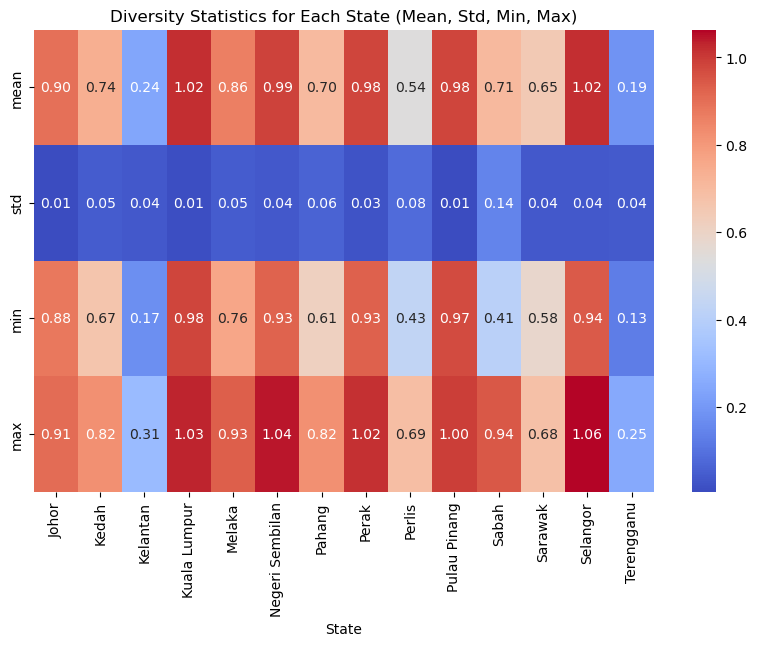

In [16]:
# Set plot size
plt.figure(figsize=(10, 6))

# Heatmap for the statistics
sns.heatmap(state_div_stats.set_index('State').T, annot=True, cmap='coolwarm', fmt='.2f')

# Add title
plt.title('Diversity Statistics for Each State (Mean, Std, Min, Max)')
plt.show()


In [17]:
import plotly.express as px
import plotly.graph_objects as go

# Prepare data: Transpose the dataframe for a heatmap and reset index
heatmap_data = state_div_stats.set_index('State').T

# Create heatmap
fig = go.Figure(data=go.Heatmap(
    z=heatmap_data.values,
    x=heatmap_data.columns,
    y=heatmap_data.index,
    colorscale='Viridis',  # You can choose another color scale like 'coolwarm'
    colorbar_title="Stats",
    zmin=heatmap_data.min().min(),  # Set min value for color scale
    zmax=heatmap_data.max().max()   # Set max value for color scale
))

# Add title and axis labels
fig.update_layout(
    title="Diversity Statistics for Each State (Mean, Std, Min, Max)",
    title_x=0.5,
    height=400,
    width=800,
    xaxis_title="State",
    yaxis_title="Statistic",
    template="plotly_dark"  # Optional: apply dark mode
)

fig.write_html("../charts_html/div-stats.html")

fig.show()


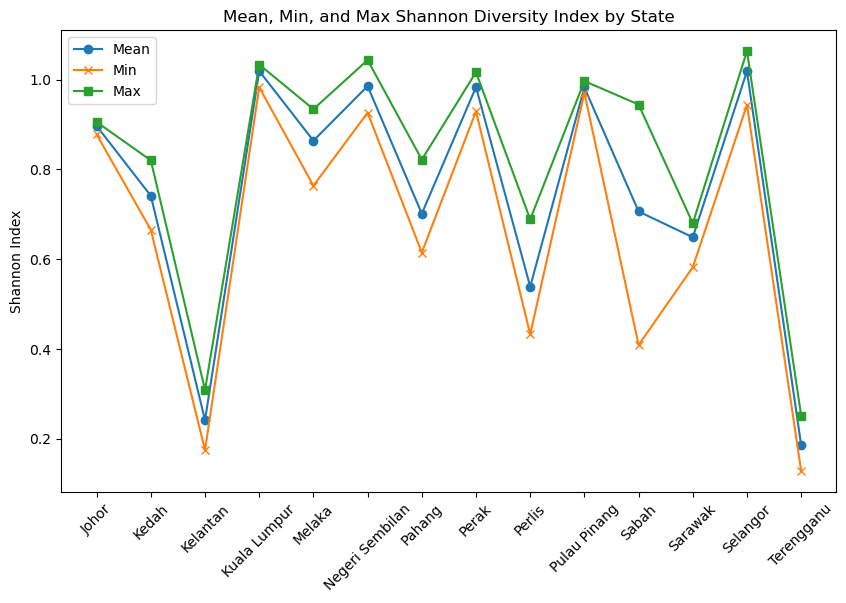

In [18]:
# Set plot size
plt.figure(figsize=(10, 6))

# Line plot for mean, min, and max values
plt.plot(state_div_stats['State'], state_div_stats['mean'], label='Mean', marker='o')
plt.plot(state_div_stats['State'], state_div_stats['min'], label='Min', marker='x')
plt.plot(state_div_stats['State'], state_div_stats['max'], label='Max', marker='s')

# Add title and labels
plt.title('Mean, Min, and Max Shannon Diversity Index by State')
plt.ylabel('Shannon Index')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Trend Analysis using Linear Regression

In [19]:
import plotly.express as px
import statsmodels.api as sm

# Loop through each state and calculate linear regression
trend_lines = []

for state in diversity_df['State'].unique():
    # Filter data for the state
    state_data = diversity_df[diversity_df['State'] == state]
    
    # Set up the regression (Shannon Index ~ Year)
    X = sm.add_constant(state_data['Year'])  # Adding a constant for the intercept
    y = state_data['Shannon_Index']
    
    # Perform linear regression
    model = sm.OLS(y, X).fit()
    
    # Get predictions for the trend line
    trend_lines.append(pd.DataFrame({'Year': state_data['Year'], 
                                     'Shannon_Index': model.predict(X), 
                                     'State': state}))

# Combine trend line data
trend_df = pd.concat(trend_lines)

# Plot the original data with trend lines
fig = px.scatter(diversity_df, 
                 x='Year', 
                 y='Shannon_Index', 
                 color='State', 
                 title='Trend of Racial Diversity by State (1980 - 2020)')

# Add trend lines to the plot
for state in diversity_df['State'].unique():
    state_trend = trend_df[trend_df['State'] == state]
    fig.add_traces(px.line(state_trend, x='Year', y='Shannon_Index', color_discrete_sequence=['black']).data)

fig.update_layout(
    height=600,
    width=850,
    title_x=0.5,  # Center title
    legend_title='State',  # Optional: change the legend title
    legend_orientation='h',  # Arrange legend horizontally
    legend=dict(x=0.5, xanchor='center', y=-0.2, yanchor='top')  # Adjust legend position
)

fig.write_html("../charts_html/racial-trend.html")

fig.show()
